# En este Notebook aplicaremos la discretización, por intervalos, cuantil, por clustering,  en intervalos arbitrarios y discretizacion supervisada.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# Para discretización
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
# Cargando datos Boston House
data = pd.read_csv('/home/ia/cursoECI/cursoIV/Datasets/raw/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Separando los datos
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

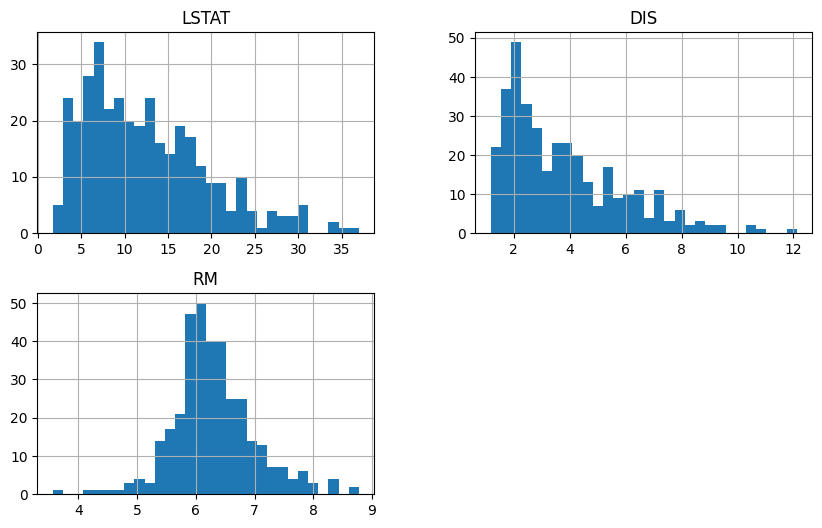

In [6]:
# Identificamos y graficamos las variables que deseamos discretizar
feature_to_discretize=['LSTAT', 'DIS', 'RM']

# Exploremos la distribución 
X_train[feature_to_discretize].hist(bins=30, figsize=(10,6))
plt.show()

### Discretización igual intervalo

In [7]:
# Configuremos y entrenemos un discretizador por intervalos de 10 bins

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy= 'uniform', random_state=1)

disc.fit(X_train[feature_to_discretize])

# Los límites de los intervalos son almacenados en bin_edges_attribute
disc.bin_edges_

array([array([ 1.73 ,  5.255,  8.78 , 12.305, 15.83 , 19.355, 22.88 , 26.405,
              29.93 , 33.455, 36.98 ])                                       ,
       array([ 1.1742 ,  2.26943,  3.36466,  4.45989,  5.55512,  6.65035,
               7.74558,  8.84081,  9.93604, 11.03127, 12.1265 ])         ,
       array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
              7.7362, 8.2581, 8.78  ])                                       ],
      dtype=object)

In [8]:
# Tranformemos el set de entrenamiento. Recordar que Sklearn regresa Numpy arrays
train_t = disc.transform(X_train[feature_to_discretize])

# Transformemos el array en dataframe
train_t = pd.DataFrame(train_t, columns = feature_to_discretize)

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,2.0
1,1.0,2.0,5.0
2,4.0,0.0,5.0
3,0.0,6.0,5.0
4,4.0,0.0,4.0


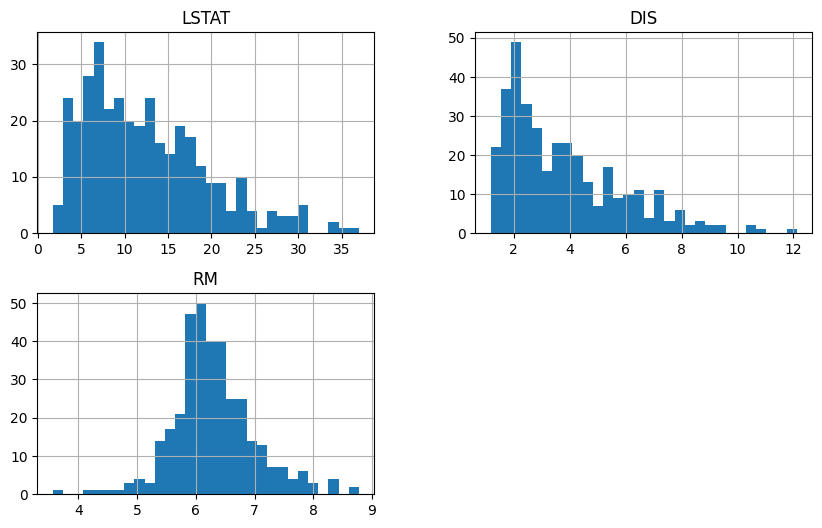

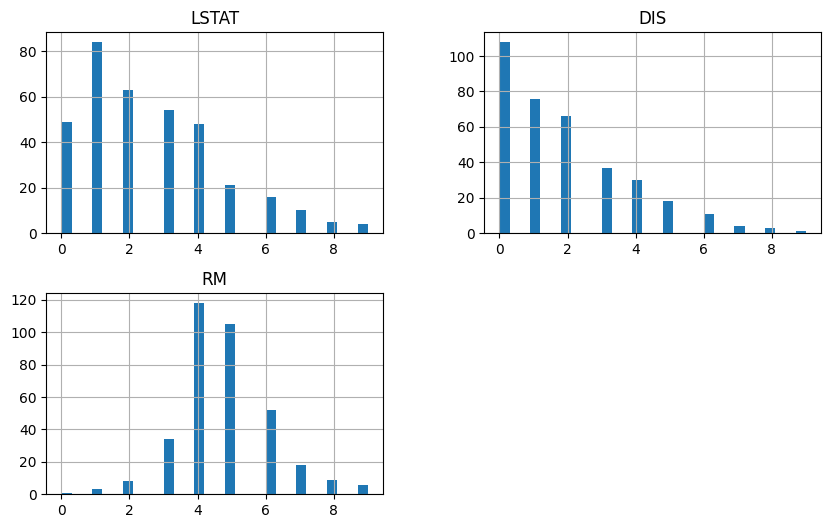

In [9]:
# Grafiquemos y comparemos
X_train[feature_to_discretize].hist(bins=30, figsize=(10,6))
plt.show()

train_t

train_t.hist(bins=30, figsize=(10,6))
plt.show()


In [10]:
# El mismo procedimiento para el conjunto de prueba

test_t = disc.transform(X_test[feature_to_discretize])

test_t = pd.DataFrame(test_t, columns = feature_to_discretize)
test_t.head(100)

,LSTAT,DIS,RM
0,1.0,3.0,5.0
1,2.0,0.0,5.0
2,2.0,1.0,5.0
3,5.0,0.0,3.0
4,3.0,3.0,5.0
...,...,...,...
95,2.0,6.0,4.0
96,9.0,0.0,1.0
97,1.0,7.0,5.0
98,4.0,1.0,5.0


### Discretización igual frecuencia

In [11]:
# Configuremos y entrenemos un discretizador basado en cuantiles con 10 bins
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile',random_state=1)

disc.fit(X_train[feature_to_discretize])

# Los limites de los intervalos son almacenados en un atributo transformado:
disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
              18.06 , 22.453, 36.98 ])                                       ,
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
               3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ])         ,
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
              6.794 , 7.185 , 8.78  ])                                       ],
      dtype=object)

In [12]:
# Tranformemos el set de entrenamiento. Recordar que Sklearn regresa Numpy arrays
train_t = disc.transform(X_train[feature_to_discretize])

train_t = pd.DataFrame(train_t, columns = feature_to_discretize)

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,0.0
1,3.0,6.0,6.0
2,7.0,2.0,5.0
3,1.0,9.0,5.0
4,7.0,2.0,2.0


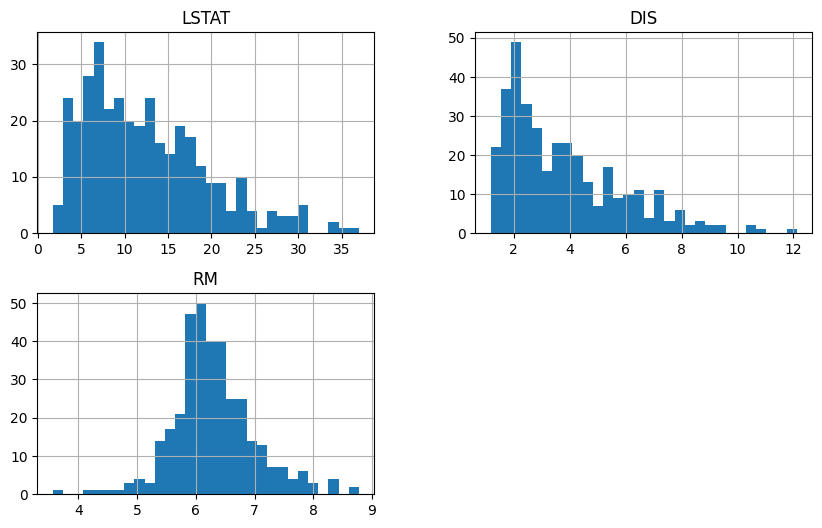

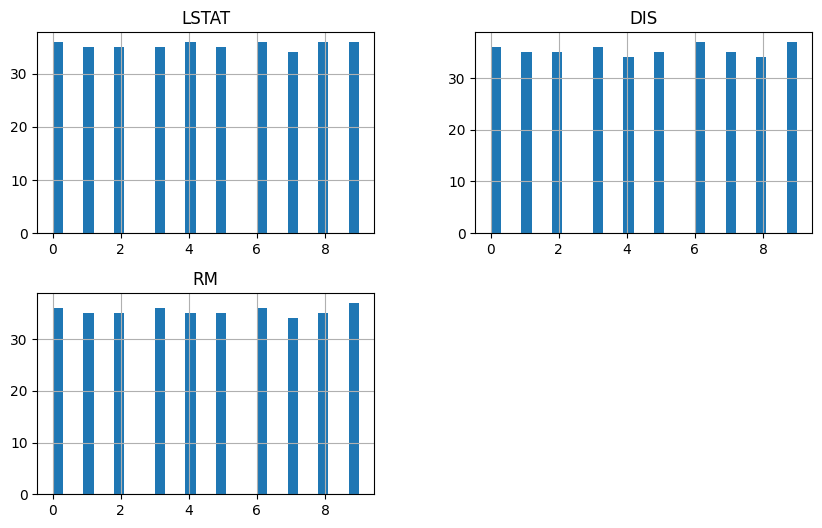

In [13]:
# Grafiquemos y comparemos
X_train[feature_to_discretize].hist(bins=30, figsize=(10,6))
plt.show()

train_t

train_t.hist(bins=30, figsize=(10,6))
plt.show()

In [14]:
# Sobre el conjunto de entrenamiento
test_t = disc.transform(X_test[feature_to_discretize])
test_t = pd.DataFrame(test_t, columns = feature_to_discretize)
test_t.head()

,LSTAT,DIS,RM
0,2.0,7.0,5.0
1,4.0,0.0,5.0
2,4.0,5.0,5.0
3,8.0,1.0,0.0
4,5.0,7.0,5.0


### Discretizacion utilizando k-means

In [15]:
# Configuremos y entrenemos un discretizador k-means
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans', random_state=1)
disc.fit(X_train[feature_to_discretize])

# Inspeccionamos las fronteras de los bins:
disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.03266667, 15.46755102,
              18.89709647, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
              36.98      ])                                                   ,
       array([ 1.1742    ,  2.26301884,  3.30153104,  4.48057886,  5.60712611,
               6.6482802 ,  7.56131797,  8.45406587,  9.7820881 , 11.37686667,
              12.1265    ])                                                   ,
       array([3.561     , 3.987125  , 4.73948864, 5.32155682, 5.77285276,
              6.14207435, 6.503811  , 6.91447956, 7.43717157, 8.1095049 ,
              8.78      ])                                               ],
      dtype=object)

In [16]:
# Apliquemos la transformación al conjunto de entrenamiento
train_t = disc.transform(X_train[feature_to_discretize])
train_t = pd.DataFrame(train_t, columns = feature_to_discretize)

print(train_t.head(20))


    LSTAT  DIS   RM
0     9.0  0.0  2.0
1     1.0  2.0  6.0
2     4.0  0.0  5.0
3     0.0  6.0  5.0
4     4.0  0.0  4.0
5     4.0  2.0  4.0
6     3.0  4.0  3.0
7     5.0  2.0  3.0
8     7.0  0.0  5.0
9     2.0  2.0  4.0
10    0.0  3.0  7.0
11    0.0  2.0  7.0
12    1.0  7.0  7.0
13    3.0  3.0  4.0
14    1.0  3.0  4.0
15    1.0  3.0  6.0
16    1.0  1.0  5.0
17    4.0  0.0  4.0
18    0.0  4.0  6.0
19    6.0  0.0  2.0


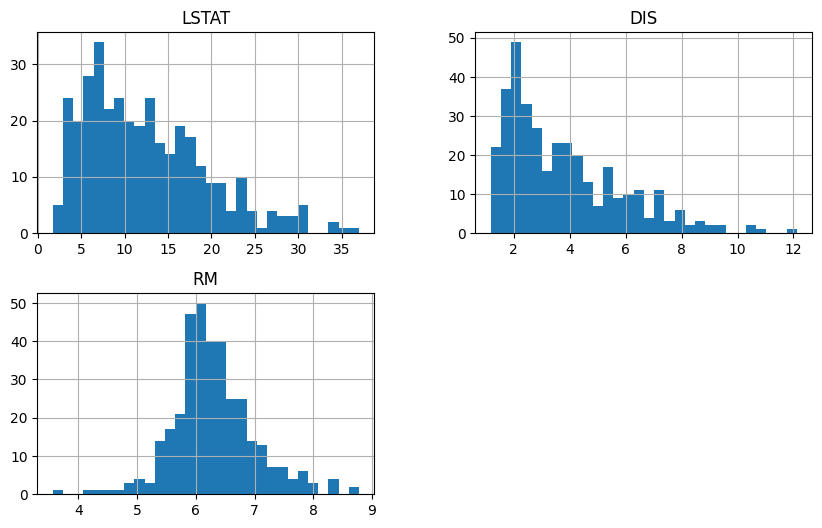

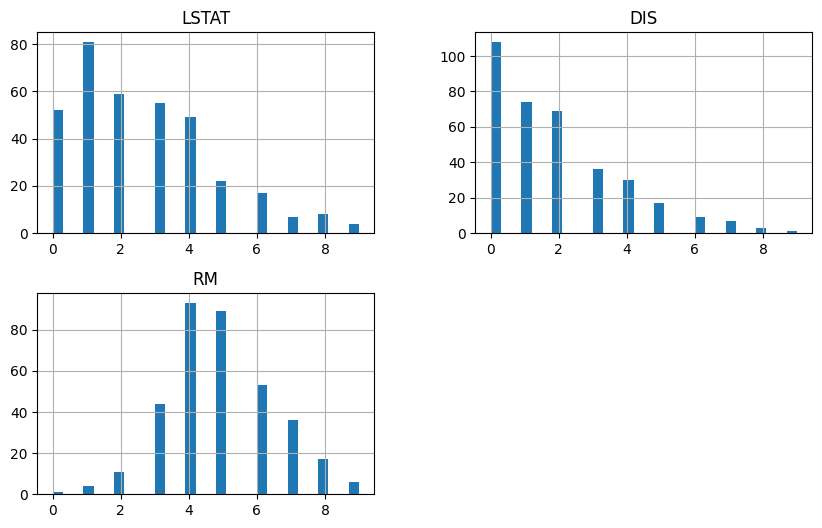

In [17]:
# Grafiquemos y comparemos
X_train[feature_to_discretize].hist(bins=30, figsize=(10,6))
plt.show()

train_t

train_t.hist(bins=30, figsize=(10,6))
plt.show()

In [18]:
# Sobre el conjunto de prueba

test_t = disc.transform(X_test[feature_to_discretize])
test_t = pd.DataFrame(test_t, columns = feature_to_discretize)
test_t.head()

,LSTAT,DIS,RM
0,1.0,3.0,5.0
1,2.0,0.0,5.0
2,2.0,2.0,5.0
3,5.0,0.0,3.0
4,3.0,3.0,5.0


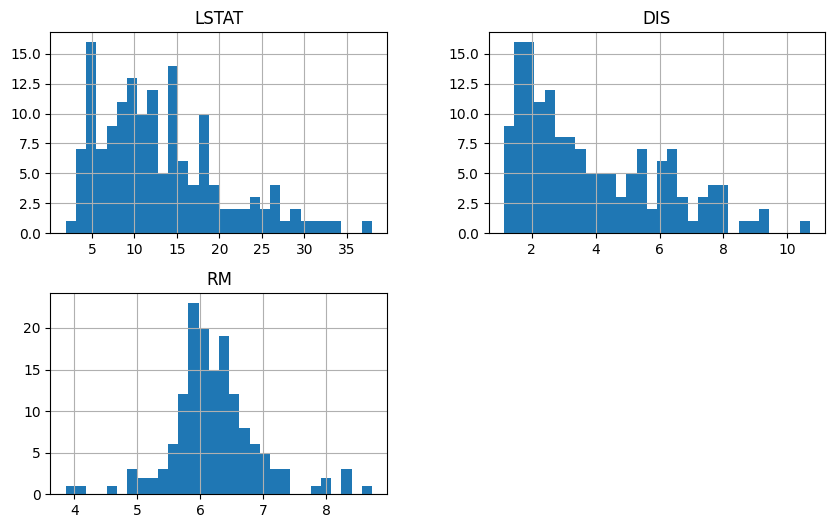

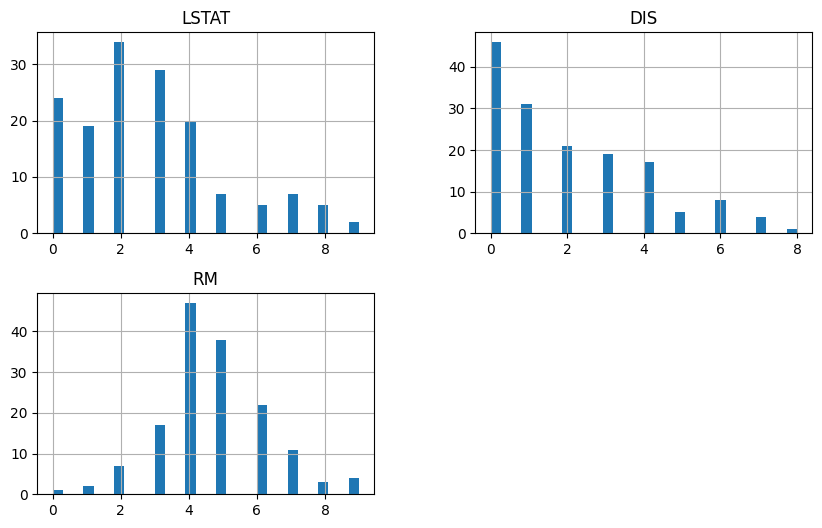

In [19]:
#Grafiquemos y comparemos en e cto. de prueba
X_test[feature_to_discretize].hist(bins=30, figsize=(10,6))
plt.show()

test_t

test_t.hist(bins=30, figsize=(10,6))
plt.show()

### Discretización por intervalos arbitrarios

Primero necesitamos determinar los límites de los intervalos

<Axes: >

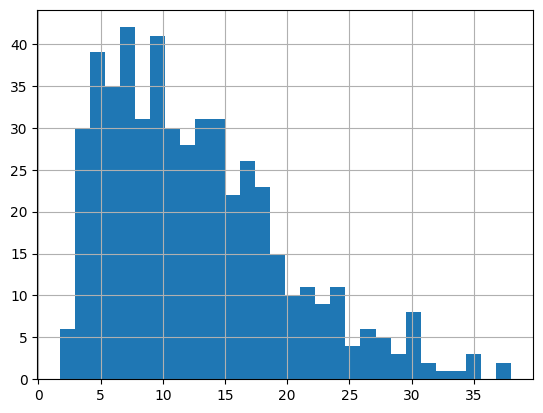

In [20]:
# Grafiquemos el histograma para variable LSTAT

data['LSTAT'].hist(bins=30)

In [21]:
# Definimos las fronteras del bin
intervals = [0, 10, 20, 30, np.Inf]

# Etiquetas de los bins
labels = ['0-10', '10-20', '20-30', '>30']

In [22]:
# Discretizemos LSTAT

# Version discretizada con strings
data['lstat_labels'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=labels, include_lowest=True)

# Versión discretizada con los limites de los intervalos
data['lstat_intervals'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=None, include_lowest=True)

# Mostramos la original y ambas versiones discretizadas de la variable
print(data[['LSTAT', 'lstat_labels', 'lstat_intervals']].head(30))

    LSTAT lstat_labels lstat_intervals
0    4.98         0-10  (-0.001, 10.0]
1    9.14         0-10  (-0.001, 10.0]
2    4.03         0-10  (-0.001, 10.0]
3    2.94         0-10  (-0.001, 10.0]
4    5.33         0-10  (-0.001, 10.0]
5    5.21         0-10  (-0.001, 10.0]
6   12.43        10-20    (10.0, 20.0]
7   19.15        10-20    (10.0, 20.0]
8   29.93        20-30    (20.0, 30.0]
9   17.10        10-20    (10.0, 20.0]
10  20.45        20-30    (20.0, 30.0]
11  13.27        10-20    (10.0, 20.0]
12  15.71        10-20    (10.0, 20.0]
13   8.26         0-10  (-0.001, 10.0]
14  10.26        10-20    (10.0, 20.0]
15   8.47         0-10  (-0.001, 10.0]
16   6.58         0-10  (-0.001, 10.0]
17  14.67        10-20    (10.0, 20.0]
18  11.69        10-20    (10.0, 20.0]
19  11.28        10-20    (10.0, 20.0]
20  21.02        20-30    (20.0, 30.0]
21  13.83        10-20    (10.0, 20.0]
22  18.72        10-20    (10.0, 20.0]
23  19.88        10-20    (10.0, 20.0]
24  16.30        10-20   

In [23]:
# Revisemos el número de observaciones por bin

data['lstat_intervals'].value_counts()

lstat_intervals
(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: count, dtype: int64

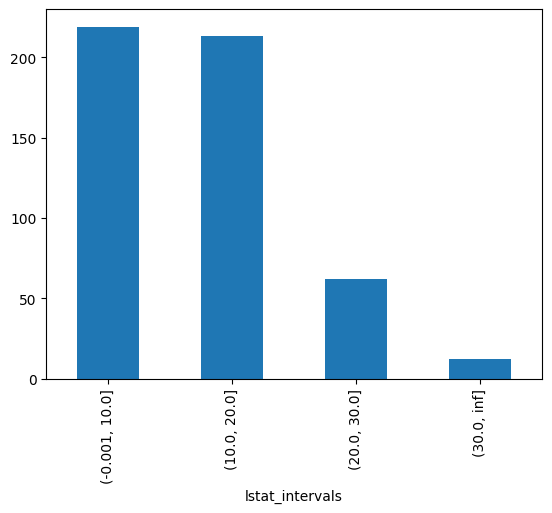

In [24]:
fig= data['lstat_intervals'].value_counts().plot.bar()

### Discretización supervisada utilizando un Entropy based discretizer

In [25]:
# Utlizamos un nuevo conjunto de datos de UCI disponible en sklearn
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [27]:
#Elegimos la variable a discretizar y el target multiclase.

variable = "magnesium"
x = df[variable].values
y = data.target


In [28]:
# Importamos e instanciamos un objeto de MDLP de la librería optbinning. 
from optbinning import MDLP

mdlp = MDLP()
mdlp.fit(x,y)
splits=mdlp.splits


(CVXPY) Jul 24 04:52:37 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 24 04:52:37 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [29]:
finalSplits=splits.tolist()
finalSplits.insert(0,0)
finalSplits.append(np.inf)

print(finalSplits)

[0, 110.09483870967742, 112.53709677419354, 118.5, inf]


In [30]:
# Versión discretizada con los limites de los intervalos
df['magnesium_intervals'] = pd.cut(
    df['magnesium'], bins=finalSplits, labels=None, include_lowest=True)

# Mostramos la original y ambas versiones discretizadas de la variable
print(df[['magnesium','magnesium_intervals']].head(30))


    magnesium magnesium_intervals
0       127.0        (118.5, inf]
1       100.0   (-0.001, 110.095]
2       101.0   (-0.001, 110.095]
3       113.0    (112.537, 118.5]
4       118.0    (112.537, 118.5]
5       112.0  (110.095, 112.537]
6        96.0   (-0.001, 110.095]
7       121.0        (118.5, inf]
8        97.0   (-0.001, 110.095]
9        98.0   (-0.001, 110.095]
10      105.0   (-0.001, 110.095]
11       95.0   (-0.001, 110.095]
12       89.0   (-0.001, 110.095]
13       91.0   (-0.001, 110.095]
14      102.0   (-0.001, 110.095]
15      112.0  (110.095, 112.537]
16      120.0        (118.5, inf]
17      115.0    (112.537, 118.5]
18      108.0   (-0.001, 110.095]
19      116.0    (112.537, 118.5]
20      126.0        (118.5, inf]
21      102.0   (-0.001, 110.095]
22      101.0   (-0.001, 110.095]
23       95.0   (-0.001, 110.095]
24       96.0   (-0.001, 110.095]
25      124.0        (118.5, inf]
26       93.0   (-0.001, 110.095]
27       94.0   (-0.001, 110.095]
28      107.0 

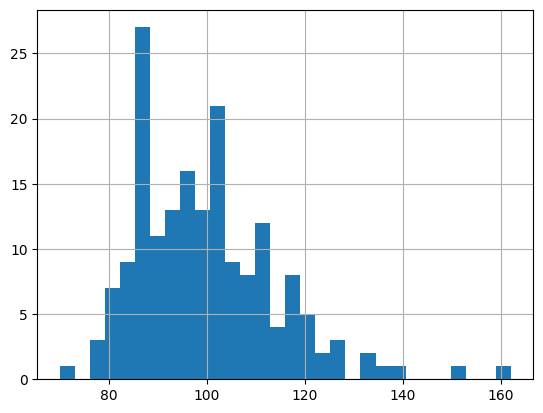

In [31]:
#Grafiquemos y comparemos
df['magnesium'].hist(bins=30)
plt.show()

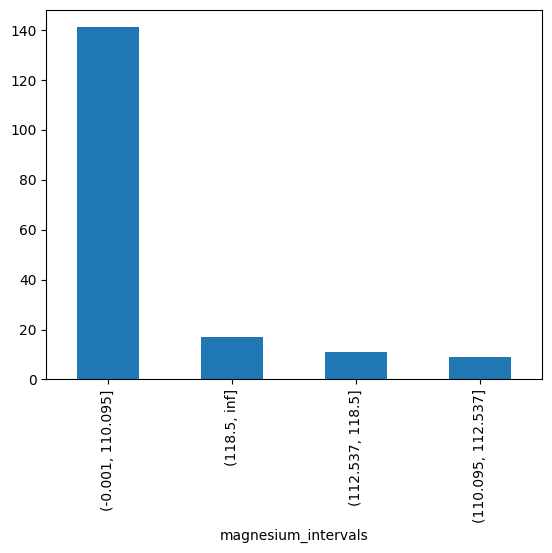

In [32]:
fig= df['magnesium_intervals'].value_counts().plot.bar()

### Discretización supervisada utilizando arboles de desicion

Se deje como ejercicio